In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
from sklearn import svm, datasets , metrics

In [8]:
data1 = np.loadtxt("A1.txt")
data2 = np.loadtxt("A2.txt")
data3 = np.loadtxt("A3.txt")
data4 = np.loadtxt("A4.txt")
data5 = np.loadtxt("A5.txt")
data6 = np.loadtxt("A6.txt")
data7 = np.loadtxt("A7.txt")

data = np.concatenate((data1,data2,data3,data4,data5,data6,data7))

print(data.shape)


XTrain = data[:,0:520]
yTrain = data[:,520]
print(XTrain.shape)

Tdata1 = np.loadtxt("T1.txt")
Tdata2 = np.loadtxt("T2.txt")
Tdata3 = np.loadtxt("T3.txt")
Tdata4 = np.loadtxt("T4.txt")
Tdata5 = np.loadtxt("T5.txt")
Tdata6 = np.loadtxt("T6.txt")
Tdata7 = np.loadtxt("T7.txt")

Tdata = np.concatenate((Tdata1,Tdata2,Tdata3,Tdata4,Tdata5,Tdata6,Tdata7))

print(Tdata.shape)


XTest = Tdata[:,0:520]
yTest = Tdata[:,520]
print(XTrain.shape)


(105, 521)
(105, 520)
(670, 521)
(105, 520)


In [9]:
# from sklearn.ensemble import ExtraTreesClassifier

# from sklearn.feature_selection import SelectFromModel
# XTrain = data[:,0:500]
# yTrain = data[:,520]
# XTrain.shape

# clf = ExtraTreesClassifier()
# clf = clf.fit(XTrain, yTrain)
# clf.feature_importances_  
# # array([ 0.04...,  0.05...,  0.4...,  0.4...])
# model = SelectFromModel(clf, prefit=True)
# X_new = model.transform(XTrain)
# X_new.shape 

Feature ranking:
1. feature 53 (0.015904)
2. feature 4 (0.015564)
3. feature 32 (0.014457)
4. feature 5 (0.012910)
5. feature 6 (0.012889)
6. feature 57 (0.012480)
7. feature 33 (0.012198)
8. feature 48 (0.011935)
9. feature 56 (0.010898)
10. feature 51 (0.010851)
11. feature 49 (0.010793)
12. feature 496 (0.010418)
13. feature 24 (0.009344)
14. feature 94 (0.009180)
15. feature 34 (0.008827)
16. feature 60 (0.008820)
17. feature 45 (0.008472)
18. feature 52 (0.008423)
19. feature 478 (0.008310)
20. feature 41 (0.008015)
21. feature 93 (0.007900)
22. feature 50 (0.007788)
23. feature 31 (0.007555)
24. feature 482 (0.007543)
25. feature 96 (0.007538)
26. feature 21 (0.007485)
27. feature 62 (0.007463)
28. feature 55 (0.007204)
29. feature 37 (0.007115)
30. feature 20 (0.006931)
31. feature 54 (0.006891)
32. feature 25 (0.006751)
33. feature 82 (0.006735)
34. feature 8 (0.006614)
35. feature 61 (0.006533)
36. feature 35 (0.006481)
37. feature 477 (0.006466)
38. feature 9 (0.006356)
39. f

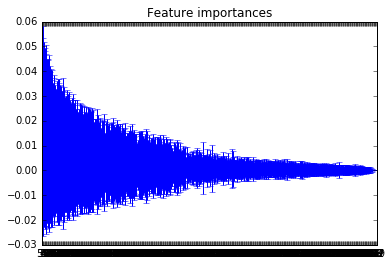

In [10]:

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(XTrain, yTrain)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(XTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(XTrain.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(XTrain.shape[1]), indices)
plt.xlim([-1, XTrain.shape[1]])
plt.show()

In [11]:
# from sklearn.svm import LinearSVC

# from sklearn.feature_selection import SelectFromModel


# XTrain.shape
# print(XTrain.shape)

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(XTrain, yTrain)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(XTrain)
# X_new.shape

# print(X_new.shape)

In [12]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(XTrain, yTrain)
#svc = svm.SVC(kernel='rbf', gamma=0.05, C=C).fit(XTrain, yTrain)
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(XTrain, yTrain)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(XTrain, yTrain)
# lin_svc = svm.LinearSVC(C=C).fit(XTrain, yTrain)



# Now predict the value of the digit on the test data:
expected = yTest
predicted = svc.predict(XTest)

print("Classification report for classifier %s:\n%s\n"
      % (svc, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        1.0       0.51      0.54      0.53        96
        2.0       0.51      0.48      0.49        96
        3.0       0.73      0.90      0.80        98
        4.0       0.84      0.70      0.76        94
        5.0       0.79      0.95      0.86        96
        6.0       0.87      0.93      0.90        98
        7.0       0.98      0.62      0.76        92

avg / total       0.74      0.73      0.73       670


Confusion matrix:
[[52 44  0  0  0  0  0]
 [50 46  0  0  0  0  0]
 [ 0  0 88 10  0  0  0]
 [ 0  0 28 66  0  0  0]
 [ 0  0  0  0 91  4  1]
 [ 0  0  4  3  0 91  0]
 [ 0  0  1  0 24 10 57]]
